In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente2/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

13932

In [6]:
with open('dataset/generado/paciente2/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

13932

In [8]:
with open('dataset/generado/paciente2/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

1741

In [10]:
with open('dataset/generado/paciente2/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

1741

In [12]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

1742

In [14]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

1742

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/vanilla_dropout.h5')

Epoch 1/50
436/436 [==============================] - 27s 37ms/step - loss: 0.0068 - mae: 0.0582 - mse: 0.0068 - val_loss: 0.0025 - val_mae: 0.0407 - val_mse: 0.0025
Epoch 2/50
436/436 [==============================] - 14s 31ms/step - loss: 0.0031 - mae: 0.0415 - mse: 0.0031 - val_loss: 0.0016 - val_mae: 0.0327 - val_mse: 0.0016
Epoch 3/50
436/436 [==============================] - 14s 33ms/step - loss: 0.0022 - mae: 0.0348 - mse: 0.0022 - val_loss: 0.0014 - val_mae: 0.0294 - val_mse: 0.0014
Epoch 4/50
436/436 [==============================] - 15s 34ms/step - loss: 0.0018 - mae: 0.0308 - mse: 0.0018 - val_loss: 0.0010 - val_mae: 0.0255 - val_mse: 0.0010
Epoch 5/50
436/436 [==============================] - 15s 34ms/step - loss: 0.0014 - mae: 0.0275 - mse: 0.0014 - val_loss: 0.0010 - val_mae: 0.0256 - val_mse: 0.0010
Epoch 6/50
436/436 [==============================] - 15s 34ms/step - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - val_loss: 0.0011 - val_mae: 0.0266 - val_mse: 0.0011
Epoc

55/55 [==============================] - 0s 7ms/step - loss: 9.2116e-04 - mae: 0.0237 - mse: 9.2116e-04
test loss, test acc: [0.0009211616707034409, 0.02368638850748539, 0.0009211616707034409]


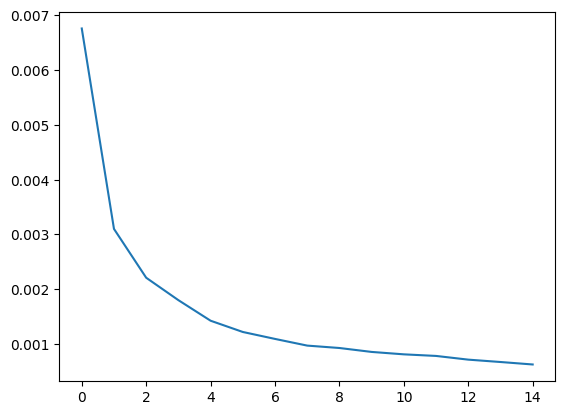

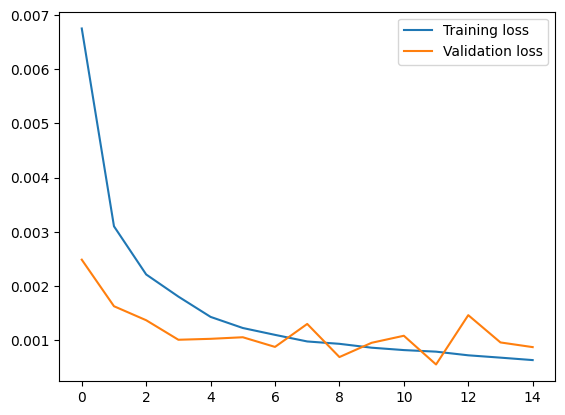

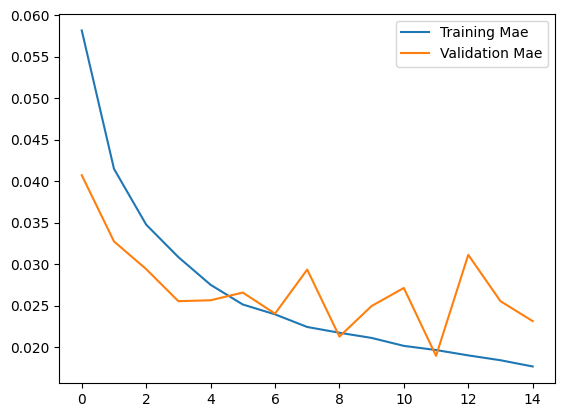

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 6ms/step


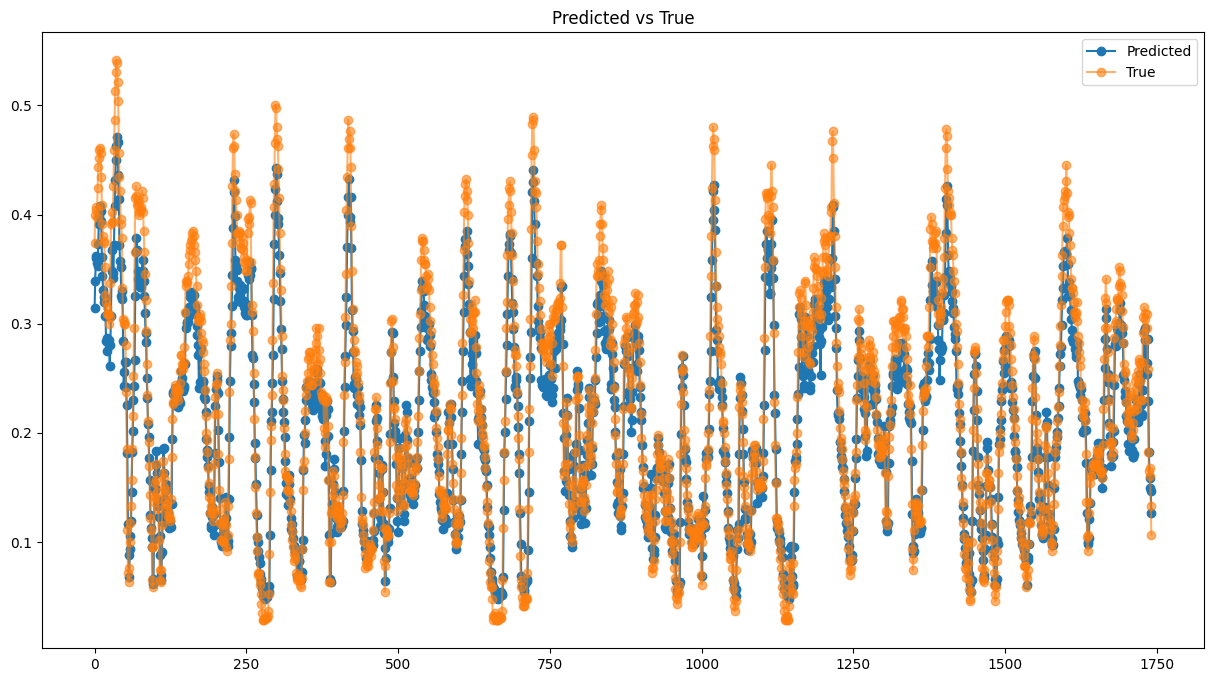

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02368639039124294,
 'mse': 0.030350645469258943,
 'rmse': 0.0009211616804006485}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/vanilla_NO_dropout.h5')

Epoch 1/50
436/436 [==============================] - 12s 24ms/step - loss: 0.0034 - mae: 0.0400 - mse: 0.0034 - val_loss: 0.0022 - val_mae: 0.0373 - val_mse: 0.0022
Epoch 2/50
436/436 [==============================] - 10s 23ms/step - loss: 0.0011 - mae: 0.0229 - mse: 0.0011 - val_loss: 9.7304e-04 - val_mae: 0.0237 - val_mse: 9.7304e-04
Epoch 3/50
436/436 [==============================] - 7s 17ms/step - loss: 6.1834e-04 - mae: 0.0173 - mse: 6.1834e-04 - val_loss: 9.8952e-04 - val_mae: 0.0246 - val_mse: 9.8952e-04
Epoch 4/50
436/436 [==============================] - 9s 21ms/step - loss: 4.9945e-04 - mae: 0.0155 - mse: 4.9945e-04 - val_loss: 9.8949e-04 - val_mae: 0.0252 - val_mse: 9.8949e-04
Epoch 5/50
436/436 [==============================] - 10s 22ms/step - loss: 4.1919e-04 - mae: 0.0141 - mse: 4.1919e-04 - val_loss: 9.2826e-04 - val_mae: 0.0248 - val_mse: 9.2826e-04


55/55 [==============================] - 1s 12ms/step - loss: 9.6532e-04 - mae: 0.0249 - mse: 9.6532e-04
test loss, test acc: [0.0009653210872784257, 0.024915942922234535, 0.0009653210872784257]


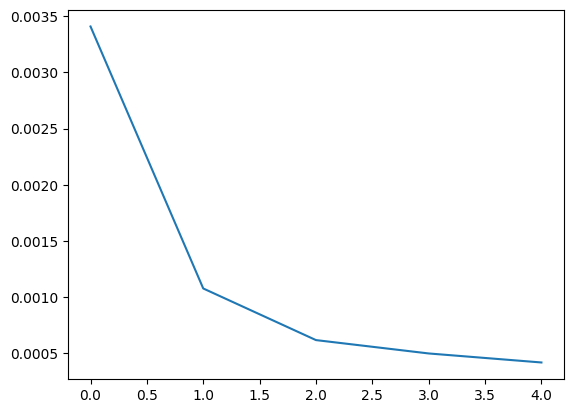

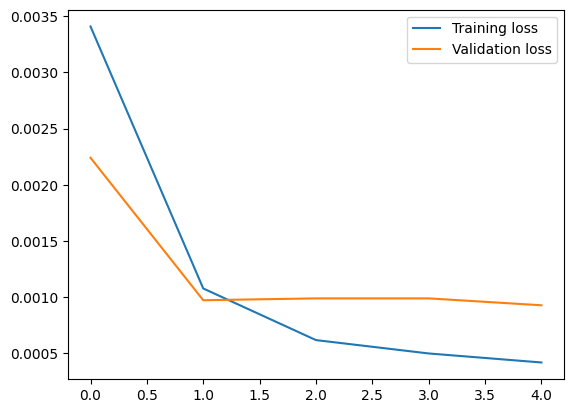

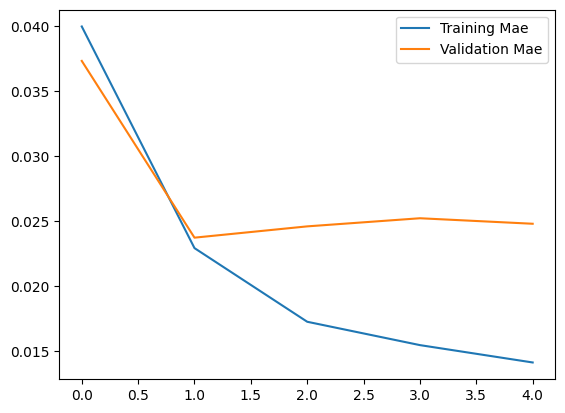

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 10ms/step


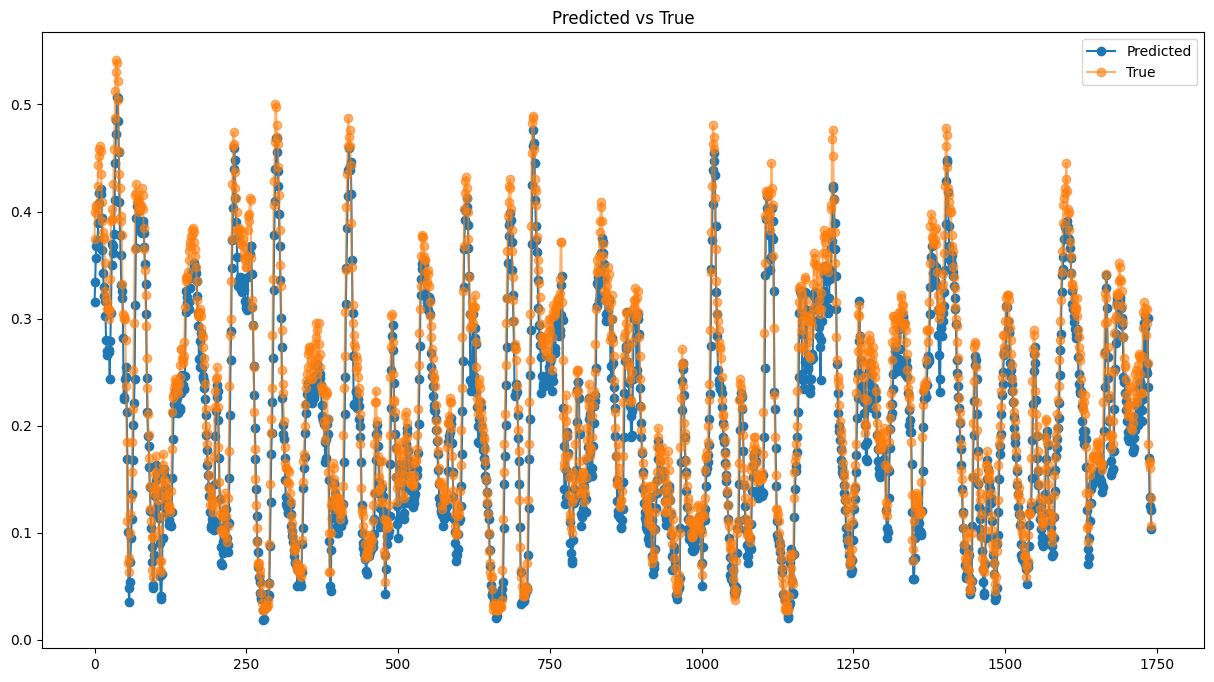

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.02491594697082157,
 'mse': 0.03106961622654842,
 'rmse': 0.000965321052465001}

# Entrenamiento Stacked LSTM sin dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/stacked_dropout.h5')

Epoch 1/50
436/436 [==============================] - 21s 40ms/step - loss: 0.0066 - mae: 0.0588 - mse: 0.0066 - val_loss: 0.0038 - val_mae: 0.0498 - val_mse: 0.0038
Epoch 2/50
436/436 [==============================] - 20s 45ms/step - loss: 0.0035 - mae: 0.0436 - mse: 0.0035 - val_loss: 0.0022 - val_mae: 0.0379 - val_mse: 0.0022
Epoch 3/50
436/436 [==============================] - 24s 54ms/step - loss: 0.0026 - mae: 0.0378 - mse: 0.0026 - val_loss: 0.0016 - val_mae: 0.0323 - val_mse: 0.0016
Epoch 4/50
436/436 [==============================] - 21s 47ms/step - loss: 0.0020 - mae: 0.0325 - mse: 0.0020 - val_loss: 0.0020 - val_mae: 0.0366 - val_mse: 0.0020
Epoch 5/50
436/436 [==============================] - 17s 39ms/step - loss: 0.0016 - mae: 0.0287 - mse: 0.0016 - val_loss: 0.0013 - val_mae: 0.0295 - val_mse: 0.0013
Epoch 6/50
436/436 [==============================] - 25s 58ms/step - loss: 0.0013 - mae: 0.0259 - mse: 0.0013 - val_loss: 7.8494e-04 - val_mae: 0.0218 - val_mse: 7.8494e

55/55 [==============================] - 1s 23ms/step - loss: 0.0011 - mae: 0.0262 - mse: 0.0011
test loss, test acc: [0.0010526509722694755, 0.026229171082377434, 0.0010526509722694755]


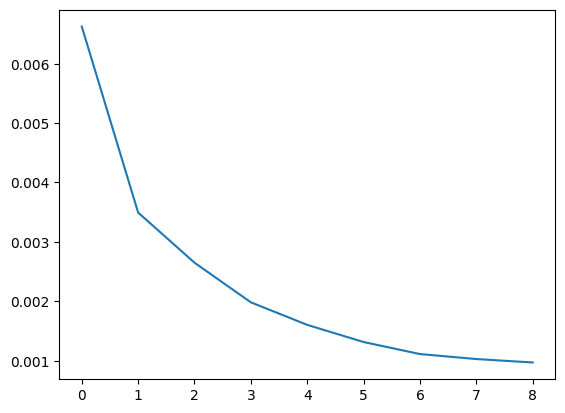

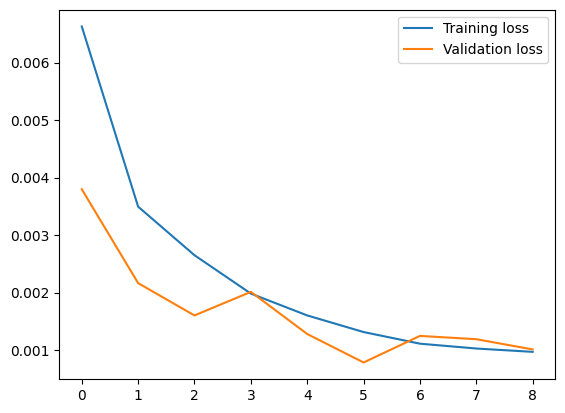

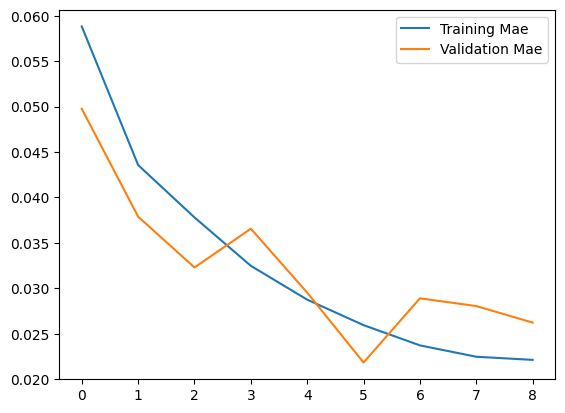

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 3s 21ms/step


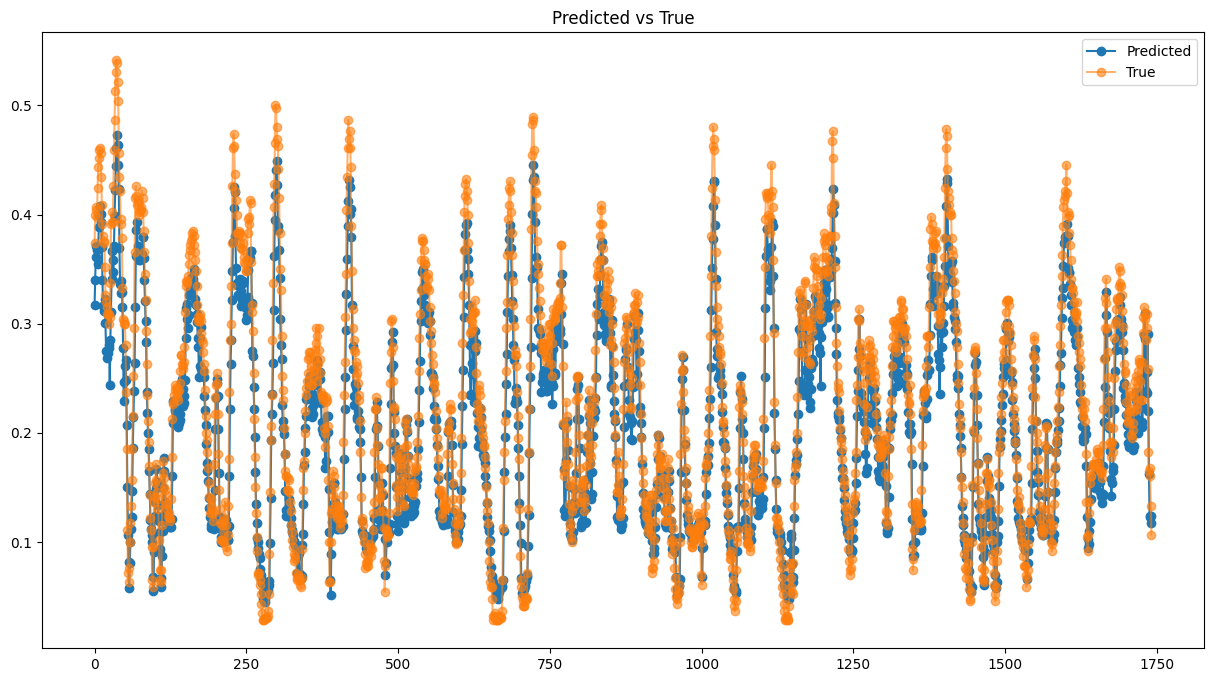

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.026229178158395868,
 'mse': 0.032444585536209006,
 'rmse': 0.0010526511306163827}

# Entrenamiento Stacked LSTM con dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/stacked_NO_dropout.h5')

Epoch 1/50
436/436 [==============================] - 45s 72ms/step - loss: 0.0077 - mae: 0.0584 - mse: 0.0077 - val_loss: 0.0054 - val_mae: 0.0600 - val_mse: 0.0054
Epoch 2/50
436/436 [==============================] - 29s 67ms/step - loss: 0.0027 - mae: 0.0365 - mse: 0.0027 - val_loss: 0.0046 - val_mae: 0.0563 - val_mse: 0.0046
Epoch 3/50
436/436 [==============================] - 30s 69ms/step - loss: 0.0019 - mae: 0.0307 - mse: 0.0019 - val_loss: 0.0031 - val_mae: 0.0462 - val_mse: 0.0031
Epoch 4/50
436/436 [==============================] - 30s 68ms/step - loss: 0.0012 - mae: 0.0250 - mse: 0.0012 - val_loss: 0.0014 - val_mae: 0.0304 - val_mse: 0.0014
Epoch 5/50
436/436 [==============================] - 29s 65ms/step - loss: 8.0306e-04 - mae: 0.0200 - mse: 8.0306e-04 - val_loss: 8.4716e-04 - val_mae: 0.0225 - val_mse: 8.4716e-04
Epoch 6/50
436/436 [==============================] - 29s 66ms/step - loss: 6.2477e-04 - mae: 0.0177 - mse: 6.2477e-04 - val_loss: 6.7265e-04 - val_mae: 0

55/55 [==============================] - 1s 24ms/step - loss: 8.9561e-04 - mae: 0.0259 - mse: 8.9561e-04
test loss, test acc: [0.0008956060046330094, 0.02591213770210743, 0.0008956060046330094]


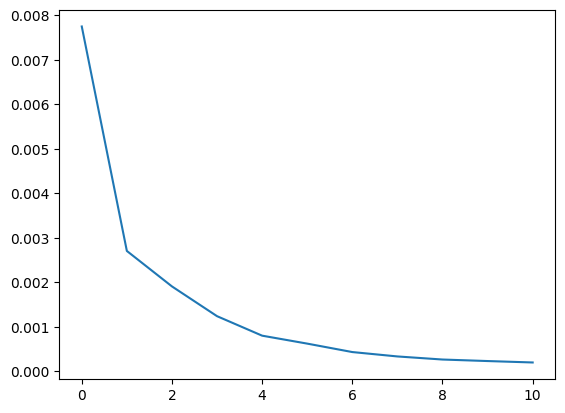

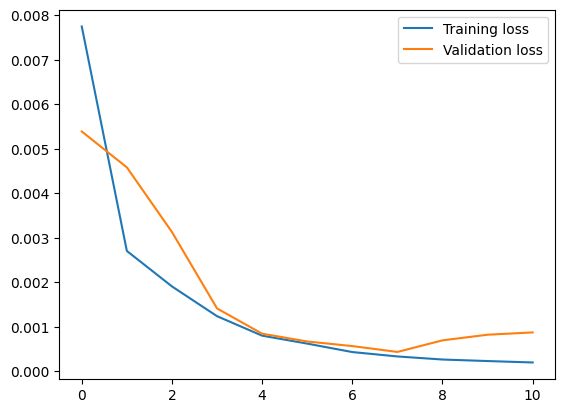

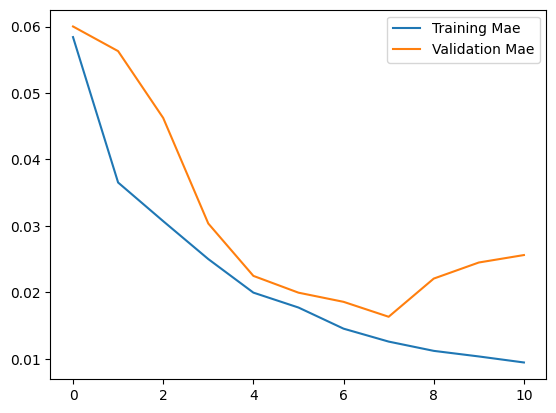

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 4s 24ms/step


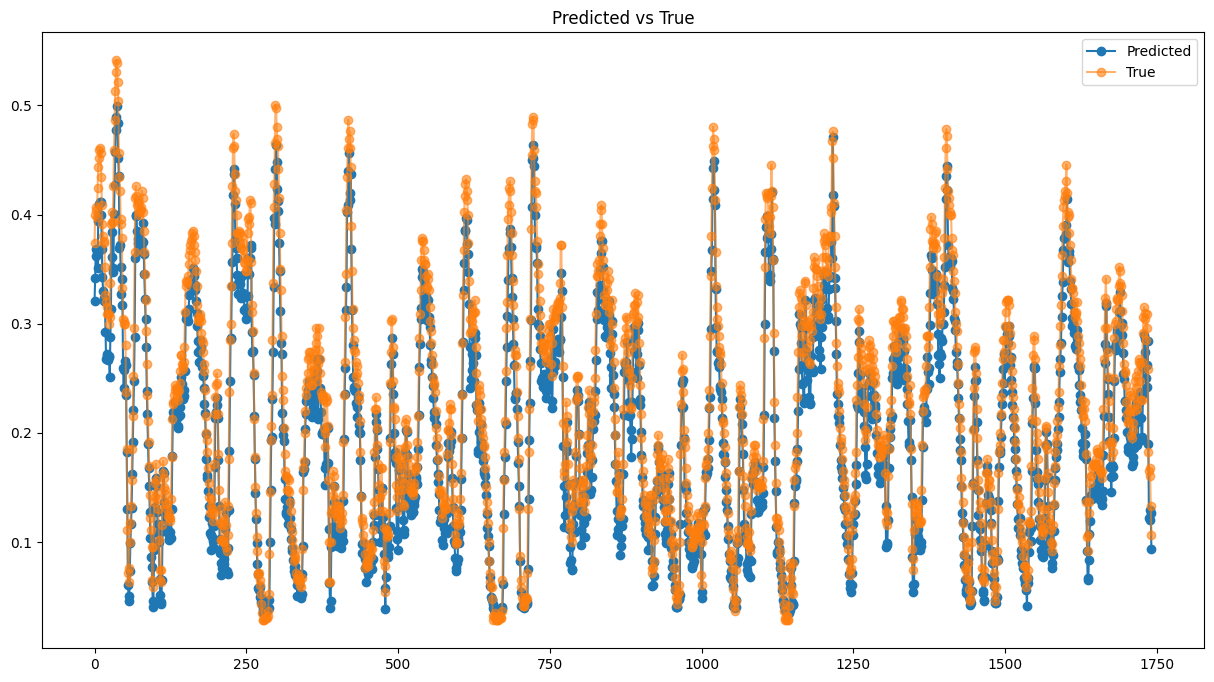

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.025912135978874762,
 'mse': 0.029926677913609093,
 'rmse': 0.0008956060509448983}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/bidirectional_dropout.h5')

Epoch 1/50
436/436 [==============================] - 40s 52ms/step - loss: 0.0071 - mae: 0.0612 - mse: 0.0071 - val_loss: 0.0031 - val_mae: 0.0452 - val_mse: 0.0031
Epoch 2/50
436/436 [==============================] - 18s 41ms/step - loss: 0.0037 - mae: 0.0454 - mse: 0.0037 - val_loss: 0.0020 - val_mae: 0.0360 - val_mse: 0.0020
Epoch 3/50
436/436 [==============================] - 19s 43ms/step - loss: 0.0026 - mae: 0.0375 - mse: 0.0026 - val_loss: 0.0014 - val_mae: 0.0305 - val_mse: 0.0014
Epoch 4/50
436/436 [==============================] - 20s 47ms/step - loss: 0.0019 - mae: 0.0319 - mse: 0.0019 - val_loss: 0.0011 - val_mae: 0.0262 - val_mse: 0.0011
Epoch 5/50
436/436 [==============================] - 20s 45ms/step - loss: 0.0016 - mae: 0.0288 - mse: 0.0016 - val_loss: 0.0012 - val_mae: 0.0273 - val_mse: 0.0012
Epoch 6/50
436/436 [==============================] - 18s 41ms/step - loss: 0.0013 - mae: 0.0265 - mse: 0.0013 - val_loss: 0.0011 - val_mae: 0.0268 - val_mse: 0.0011
Epoc

55/55 [==============================] - 1s 14ms/step - loss: 6.0719e-04 - mae: 0.0198 - mse: 6.0719e-04
test loss, test acc: [0.0006071862881071866, 0.01977819949388504, 0.0006071862881071866]


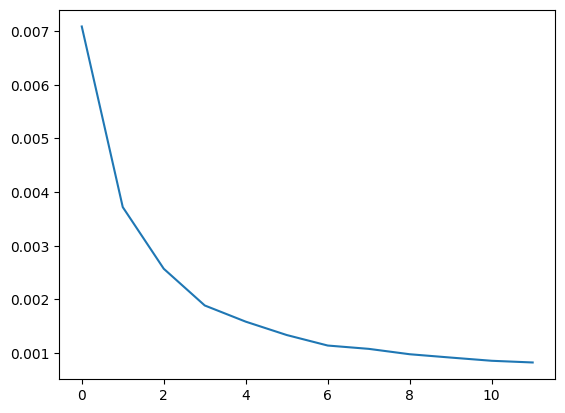

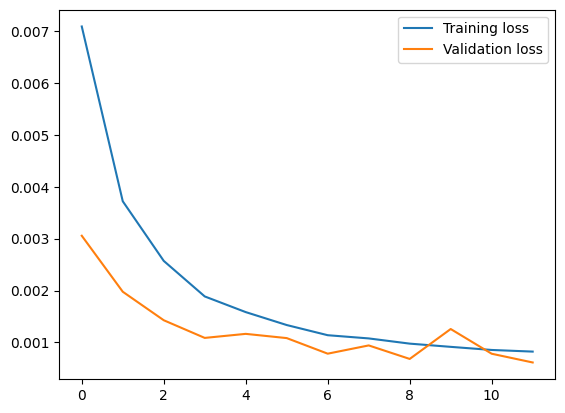

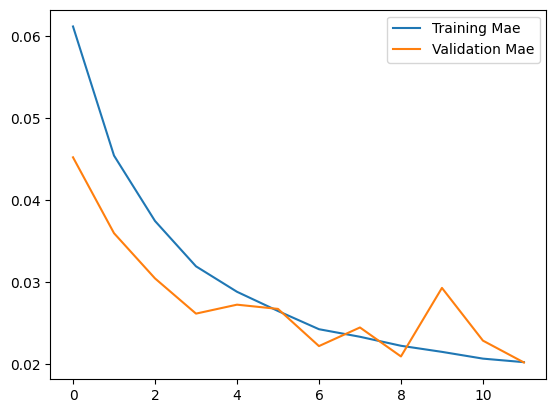

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 2s 12ms/step


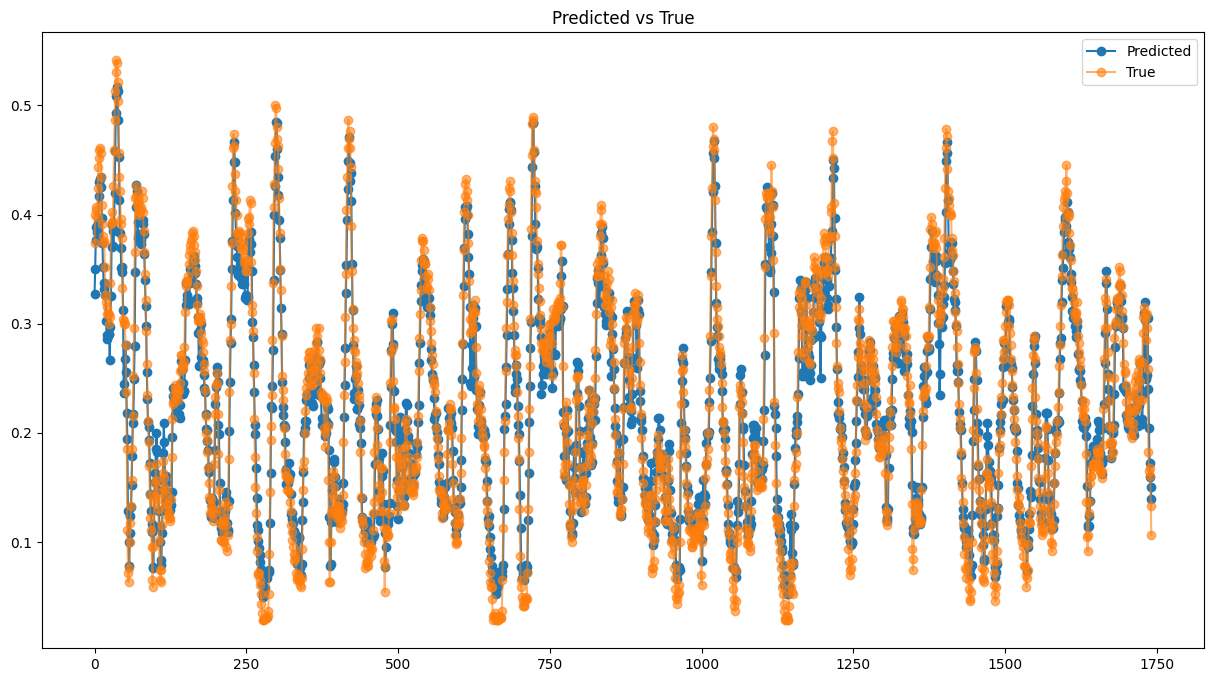

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.019778205785193032,
 'mse': 0.024641149515108828,
 'rmse': 0.000607186249425948}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente2/bidirectional_NO_dropout.h5')

Epoch 1/50
436/436 [==============================] - 21s 36ms/step - loss: 0.0036 - mae: 0.0416 - mse: 0.0036 - val_loss: 0.0042 - val_mae: 0.0542 - val_mse: 0.0042
Epoch 2/50
436/436 [==============================] - 15s 35ms/step - loss: 0.0017 - mae: 0.0300 - mse: 0.0017 - val_loss: 0.0017 - val_mae: 0.0340 - val_mse: 0.0017
Epoch 3/50
436/436 [==============================] - 16s 36ms/step - loss: 0.0011 - mae: 0.0234 - mse: 0.0011 - val_loss: 0.0010 - val_mae: 0.0245 - val_mse: 0.0010
Epoch 4/50
436/436 [==============================] - 15s 34ms/step - loss: 7.6671e-04 - mae: 0.0195 - mse: 7.6671e-04 - val_loss: 8.3217e-04 - val_mae: 0.0220 - val_mse: 8.3217e-04
Epoch 5/50
436/436 [==============================] - 17s 38ms/step - loss: 5.8091e-04 - mae: 0.0168 - mse: 5.8091e-04 - val_loss: 7.0431e-04 - val_mae: 0.0202 - val_mse: 7.0431e-04
Epoch 6/50
436/436 [==============================] - 17s 39ms/step - loss: 4.6041e-04 - mae: 0.0147 - mse: 4.6041e-04 - val_loss: 5.7753e

55/55 [==============================] - 0s 6ms/step - loss: 5.4143e-04 - mae: 0.0186 - mse: 5.4143e-04
test loss, test acc: [0.0005414310726337135, 0.01855812594294548, 0.0005414310726337135]


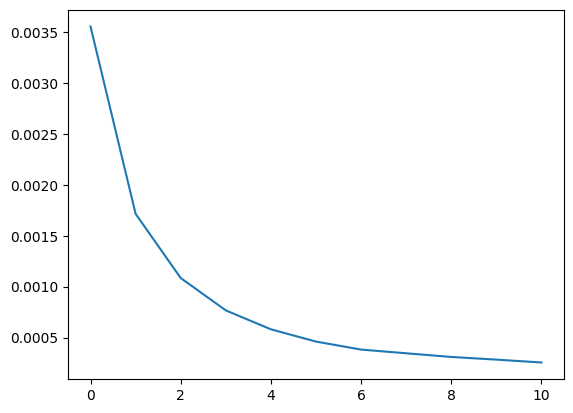

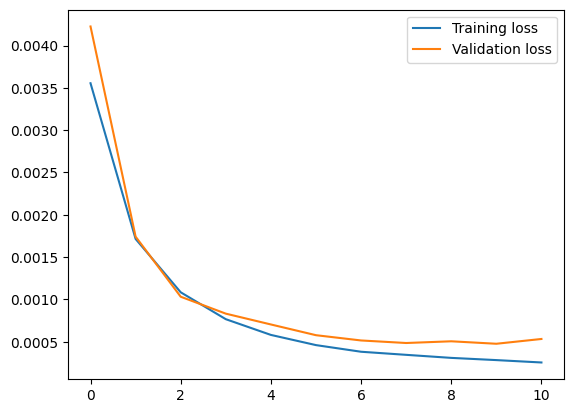

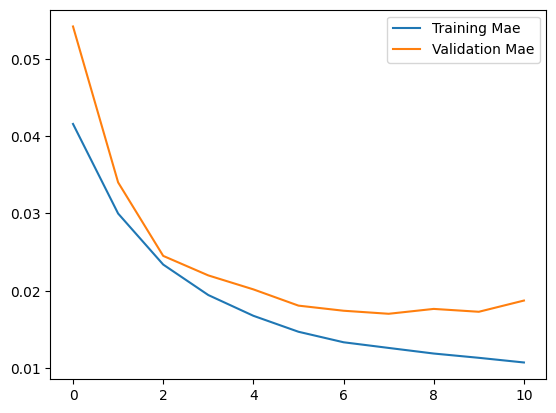

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

55/55 [==============================] - 1s 6ms/step


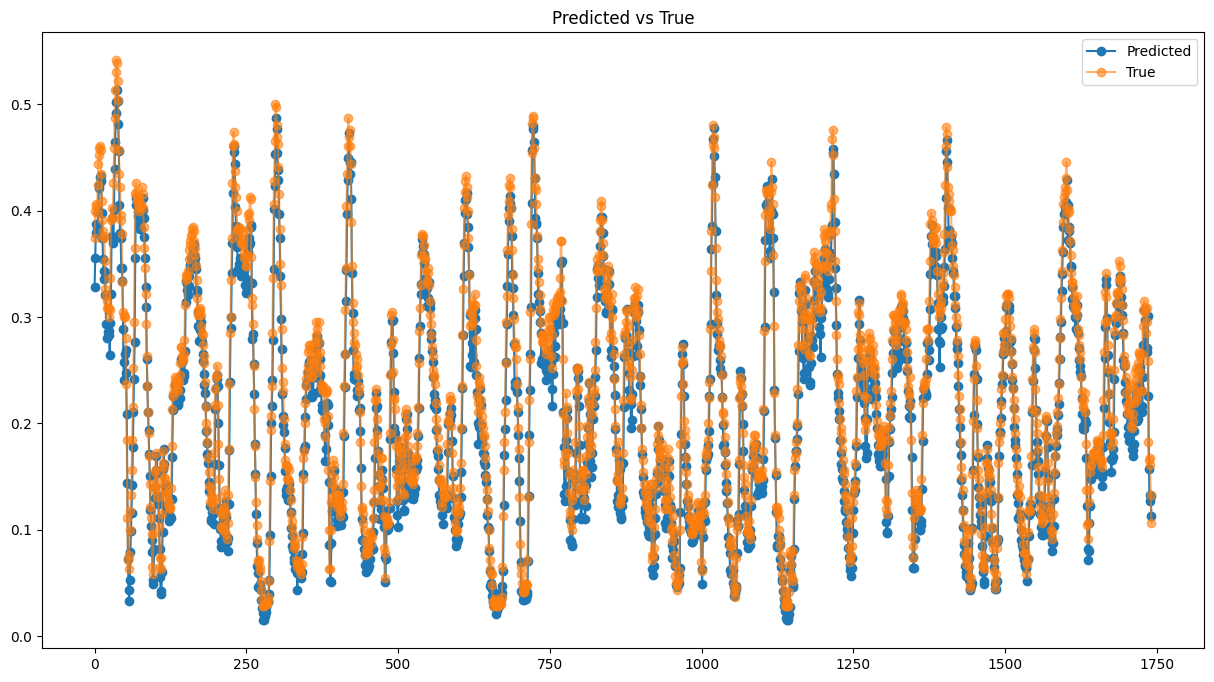

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.01855812695157067,
 'mse': 0.023268671072382174,
 'rmse': 0.000541431053474715}